# <center> Speech Emotion Recognition <center>


### I am going to build a speech emotion detection classifier.

### But first we need to learn about what is speech recognition (SER) and why are we building this project? Well, few of the reasons are-

#### First, lets define SER i.e. Speech Emotion Recognition.

- Speech Emotion Recognition, abbreviated as SER, is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.

#### Why we need it?

1. Emotion recognition is the part of speech recognition which is gaining more popularity and need for it increases enormously. Although there are methods to recognize emotion using machine learning techniques, this project attempts to use deep learning to recognize the emotions from data.

2. SER(Speech Emotion Recognition) is used in call center for classifying calls according to emotions and can be used as the performance parameter for conversational analysis thus identifying the unsatisfied customer, customer satisfaction and so on.. for helping companies improving their services

3. It can also be used in-car board system based on information of the mental state of the driver can be provided to the system to initiate his/her safety preventing accidents to happen

#### Datasets used in this project

- Crowd-sourced Emotional Mutimodal Actors Dataset (Crema-D)
- Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)
- Surrey Audio-Visual Expressed Emotion (Savee)
- Toronto emotional speech set (Tess)


# Importing Libraries


In [5]:
! pip install tensorflow==2.10

  Using cached tensorflow-2.10.0-cp310-cp310-win_amd64.whl (455.9 MB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Succ

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'd:\\Documents\\emofilm\\.venv\\Lib\\site-packages\\tensorflow\\python\\_pywrap_dtensor_device.pyd'
Check the permissions.



In [2]:
import pandas as pd
import numpy as np

import os
import sys

from pathlib import Path

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
from tensorflow import keras
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.utils import np_utils, to_categorical
# from tensorflow.keras.callbacks import ModelCheckpoint

ModuleNotFoundError: No module named 'tensorflow.python.distribute.distribution_strategy_context'

## Data Preparation

- As we are working with four different datasets, so i will be creating a dataframe storing all emotions of the data in dataframe with their paths.
- We will use this dataframe to extract features for our model training.


In [3]:
# Paths for data.
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

## <center> 1. Ravdess Dataframe <center>

Here is the filename identifiers as per the official RAVDESS website:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4
This means the meta data for the audio file is:

- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)


In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
                            5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

## <center>2. Crema DataFrame</center>


In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0  disgust  /kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1    happy  /kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2    happy  /kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3  disgust  /kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4  disgust  /kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav

## <center> 3. TESS dataset <center>


In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0     fear  /kaggle/input/toronto-emotional-speech-set-tes...
1     fear  /kaggle/input/toronto-emotional-speech-set-tes...
2     fear  /kaggle/input/toronto-emotional-speech-set-tes...
3     fear  /kaggle/input/toronto-emotional-speech-set-tes...
4     fear  /kaggle/input/toronto-emotional-speech-set-tes...

## <center> 4. CREMA-D dataset <center>

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

- 'a' = 'anger'
- 'd' = 'disgust'
- 'f' = 'fear'
- 'h' = 'happiness'
- 'n' = 'neutral'
- 'sa' = 'sadness'
- 'su' = 'surprise'


In [7]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    happy  /kaggle/input/surrey-audiovisual-expressed-emo...
1     fear  /kaggle/input/surrey-audiovisual-expressed-emo...
2    happy  /kaggle/input/surrey-audiovisual-expressed-emo...
3  disgust  /kaggle/input/surrey-audiovisual-expressed-emo...
4    angry  /kaggle/input/surrey-audiovisual-expressed-emo...

In [8]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
data_path.to_csv("data_path.csv", index=False)
data_path.head()

Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

## Data Visualisation and Exploration


First let's plot the count of each emotions in our dataset.


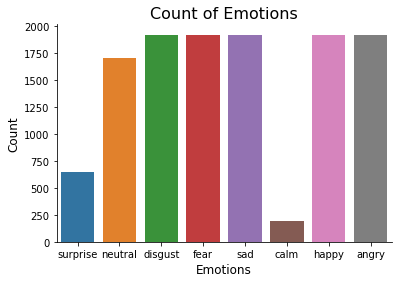

In [9]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

We can also plot waveplots and spectograms for audio signals

- Waveplots - Waveplots let us know the loudness of the audio at a given time.
- Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.


In [10]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()


def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

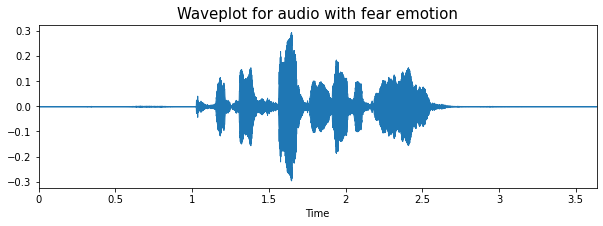

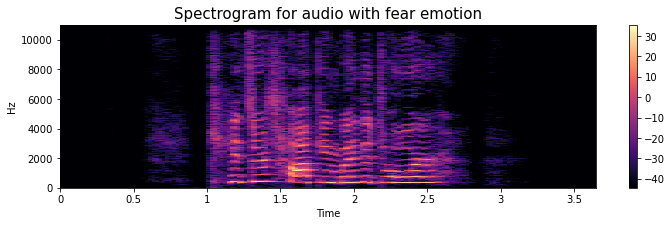

In [11]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

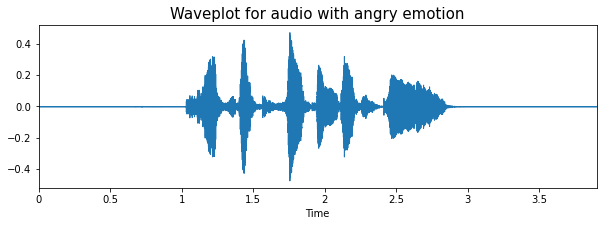

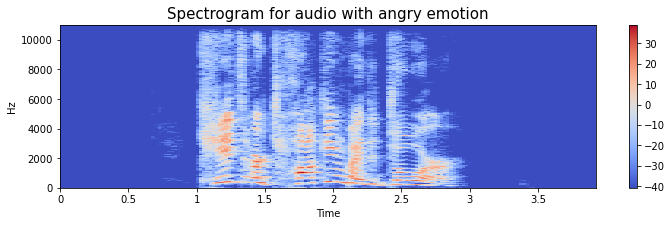

In [12]:
emotion = 'angry'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

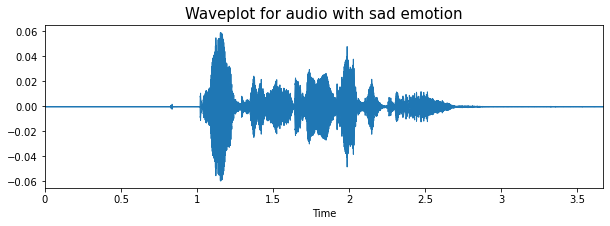

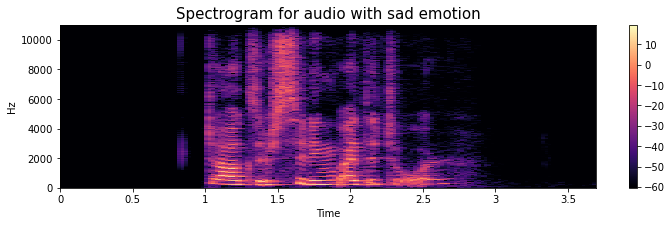

In [13]:
emotion = 'sad'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

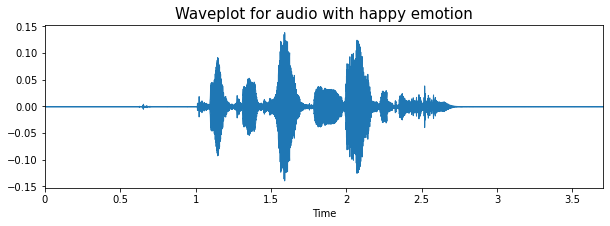

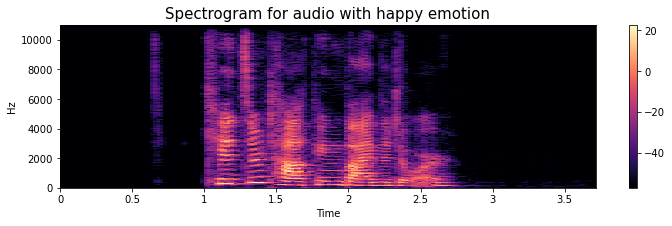

In [14]:
emotion = 'happy'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation

- Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
- To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
- The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
- In order to this to work adding the perturbations must conserve the same label as the original training sample.
- In images data augmention can be performed by shifting the image, zooming, rotating ...

First, let's check which augmentation techniques works better for our dataset.


In [15]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data


def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5)*1000)
    return np.roll(data, shift_range)


def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

#### 1. Simple Audio


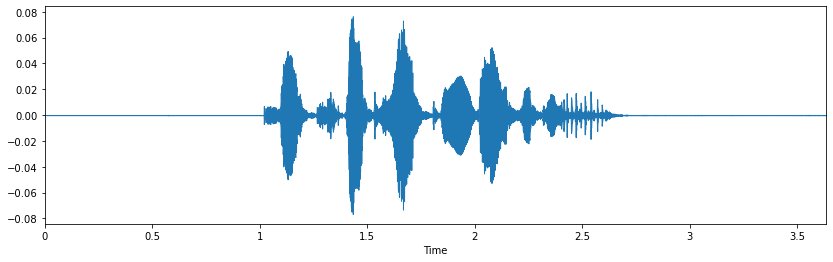

In [16]:
plt.figure(figsize=(14, 4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

#### 2. Noise Injection


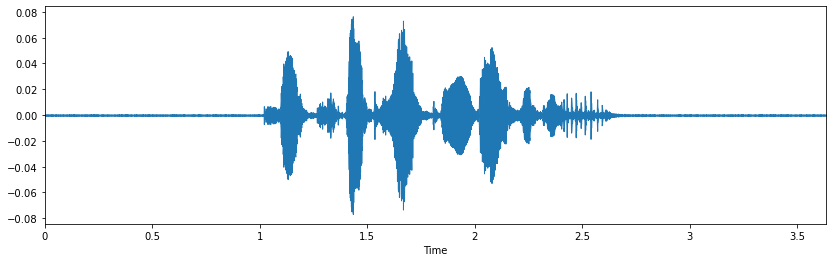

In [17]:
x = noise(data)
plt.figure(figsize=(14, 4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

We can see noise injection is a very good augmentation technique because of which we can assure our training model is not overfitted


#### 3. Stretching


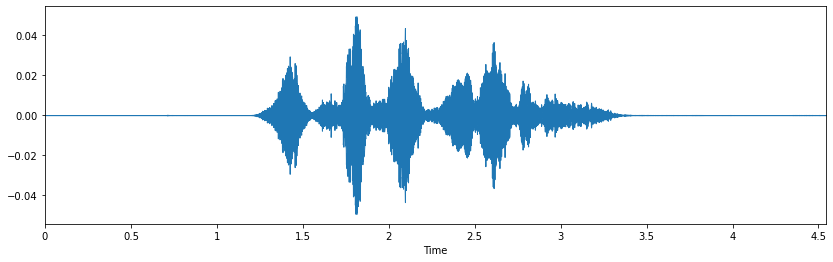

In [18]:
x = stretch(data)
plt.figure(figsize=(14, 4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 4. Shifting


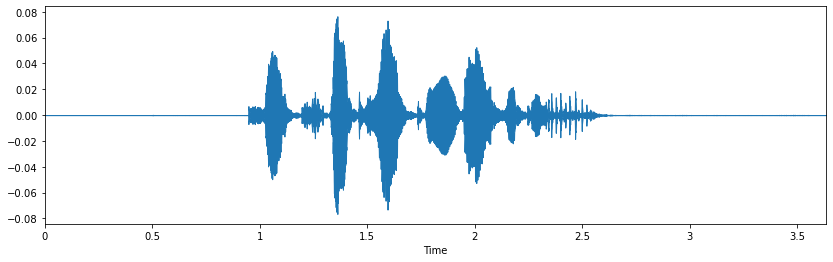

In [19]:
x = shift(data)
plt.figure(figsize=(14, 4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 5. Pitch


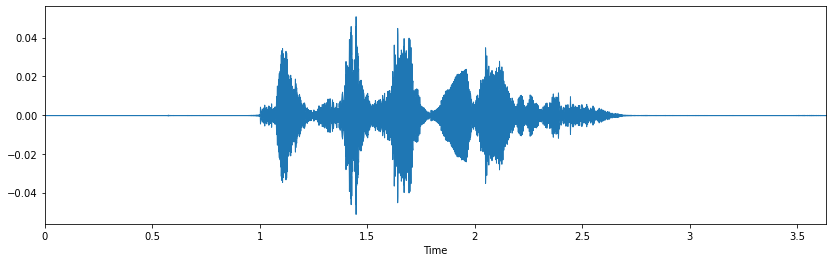

In [20]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14, 4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

- From the above types of augmentation techniques i am using noise, stretching(ie. changing speed) and some pitching.


## Feature Extraction

- Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.

The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

![image.png](https://miro.medium.com/max/633/1*7sKM9aECRmuoqTadCYVw9A.jpeg)

I am no expert on audio signals and feature extraction on audio files so i need to search and found a very good blog written by [Askash Mallik](https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225) on feature extraction.

As stated there with the help of the sample rate and the sample data, one can perform several transformations on it to extract valuable features out of it.

1. Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
2. Energy : The sum of squares of the signal values, normalized by the respective frame length.
3. Entropy of Energy : The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
4. Spectral Centroid : The center of gravity of the spectrum.
5. Spectral Spread : The second central moment of the spectrum.
6. Spectral Entropy : Entropy of the normalized spectral energies for a set of sub-frames.
7. Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
8. Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
9. MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
10. Chroma Vector : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).
11. Chroma Deviation : The standard deviation of the 12 chroma coefficients.

In this project i am not going deep in feature selection process to check which features are good for our dataset rather i am only extracting 5 features:

- Zero Crossing Rate
- Chroma_stft
- MFCC
- RMS(root mean square) value
- MelSpectogram to train our model.


In [21]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(
        S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(
        y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    return result


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))  # stacking vertically

    return result

In [22]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [89]:
spectogram_labels_csv = 'spectogram_labels.csv'
spectogram_images_dir = 'spectogram_images'
spectogram_ndarrays_dir = 'spectogram_ndarrays'
spectogram_output_dir = '/kaggle/working/spectograms/'

In [ ]:
from PIL import Image

In [ ]:
spectogram_image_pathes = []
spectogram_ndarrays_pathes = []

for audio_file, emotion in zip(data_path.Path, data_path.Emotions):
    # Load audio data
    audio_data, sr = librosa.load(audio_file, sr=None)
    base_name = Path(audio_file).stem

    filename = f'{emotion}_{base_name}.png'
    # Define the output image file path
    output_file = os.path.join(
        spectogram_output_dir, spectogram_images_dir, filename)
    # Create the subdirectories if they don't exist
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    spectogram_image_pathes.append(output_file)

    # Create Mel-frequency spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr)
    # Convert to decibel scale
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

#     # Visualize and save as an image
#     librosa.display.specshow(mel_spectrogram_db)
#     plt.legend().remove()
#     plt.colorbar(format='%+2.0f dB')

#     # Save the spectrogram as an image
#     plt.savefig(output_file)
#     plt.close()

    # Visualize without legend
    plt.figure()
    ax = plt.subplot()
    librosa.display.specshow(mel_spectrogram_db, ax=ax)

    # Remove colorbar
#     plt.colorbar(format='%+2.0f dB')
    ax.get_xaxis().set_visible(False)  # Remove x-axis labels
    ax.get_yaxis().set_visible(False)  # Remove y-axis labels

    # Save the spectrogram as an image
    plt.gca().set_axis_off()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.savefig(output_file)
    plt.close()

    # Optionally, you can save the NumPy array instead
    filename = f'{emotion}_{base_name}.npy'
    output_file = os.path.join(
        spectogram_output_dir, spectogram_ndarrays_dir, filename)
    # Create the subdirectories if they don't exist
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    spectogram_ndarrays_pathes.append(output_file)

    np.save(output_file, mel_spectrogram_db)

In [ ]:
Images = data_path[['Emotions']].copy()
Images['Path'] = spectogram_image_pathes

Ndarrays = data_path[['Emotions']].copy()
Ndarrays['Path'] = spectogram_ndarrays_pathes

Images.to_csv('/kaggle/working/spectograms/imges.csv', index=False)
Ndarrays.to_csv('/kaggle/working/spectograms/ndarrays.csv', index=False)

In [23]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [24]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.236364  0.682681  0.670631  0.614893  0.577180  0.557824  0.635630   
1  0.308056  0.703011  0.714257  0.711690  0.693012  0.688188  0.721847   
2  0.173148  0.671824  0.640110  0.576241  0.517699  0.501699  0.615085   
3  0.249344  0.623057  0.581343  0.598568  0.622959  0.593760  0.598832   
4  0.311401  0.684162  0.688489  0.738046  0.746257  0.708505  0.654733   

          7         8         9  ...       153       154       155       156  \
0  0.667002  0.664258  0.670328  ...  0.000234  0.000236  0.000138  0.000129   
1  0.696778  0.676075  0.659487  ...  0.000606  0.000561  0.000451  0.000478   
2  0.679769  0.680854  0.671641  ...  0.000044  0.000046  0.000047  0.000038   
3  0.650681  0.699159  0.683510  ...  0.000018  0.000016  0.000013  0.000012   
4  0.689803  0.727760  0.714799  ...  0.000159  0.000154  0.000163  0.000156   

        157       158       159       160           161    labels  
0  0.000300  0.000354  0.000212  0.000081  1.317474e-05  surprise  
1  0.000645  0.000726  0.000585  0.000434  3.563016e-04  surprise  
2  0.000026  0.000034  0.000044  0.000017  8.125645e-07  surprise  
3  0.000007  0.000008  0.000007  0.000002  2.394534e-07   neutral  
4  0.000144  0.000145  0.000134  0.000132  1.369106e-04   neutral  

[5 rows x 163 columns]

- We have applied data augmentation and extracted the features for each audio files and saved them.


## Data Preparation

- As of now we have extracted the data, now we need to normalize and split our data for training and testing.


In [50]:
X = Features.iloc[:, :-1].values
Y = Features['labels'].values

In [51]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

In [52]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [53]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [54]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

## Modelling


In [30]:
model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same',
          activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(256, kernel_size=5, strides=1,
          padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1,
          padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1,
          padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 81, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 128)          

In [31]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4,
                         verbose=0, patience=2, min_lr=0.0000001)


history = model.fit(x_train, y_train, batch_size=64, epochs=50,
                    validation_data=(x_test, y_test), callbacks=[rlrp])

Train on 27364 samples, validate on 9122 samples
Epoch 1/50
27364/27364 [==============================] - 7s 271us/step - loss: 1.6776 - accuracy: 0.3251 - val_loss: 1.5001 - val_accuracy: 0.3942
Epoch 2/50
27364/27364 [==============================] - 4s 147us/step - loss: 1.4592 - accuracy: 0.4108 - val_loss: 1.3412 - val_accuracy: 0.4638
Epoch 3/50
27364/27364 [==============================] - 4s 160us/step - loss: 1.3746 - accuracy: 0.4513 - val_loss: 1.2653 - val_accuracy: 0.4898
Epoch 4/50
27364/27364 [==============================] - 4s 148us/step - loss: 1.3220 - accuracy: 0.4685 - val_loss: 1.2229 - val_accuracy: 0.5192
Epoch 5/50
27364/27364 [==============================] - 4s 147us/step - loss: 1.2807 - accuracy: 0.4876 - val_loss: 1.1681 - val_accuracy: 0.5342
Epoch 6/50
27364/27364 [==============================] - 4s 147us/step - loss: 1.2381 - accuracy: 0.5092 - val_loss: 1.1778 - val_accuracy: 0.5292
Epoch 7/50
27364/27364 [==============================] - 4s 14

9122/9122 [==============================] - 1s 110us/step
Accuracy of our model on test data :  61.4558219909668 %


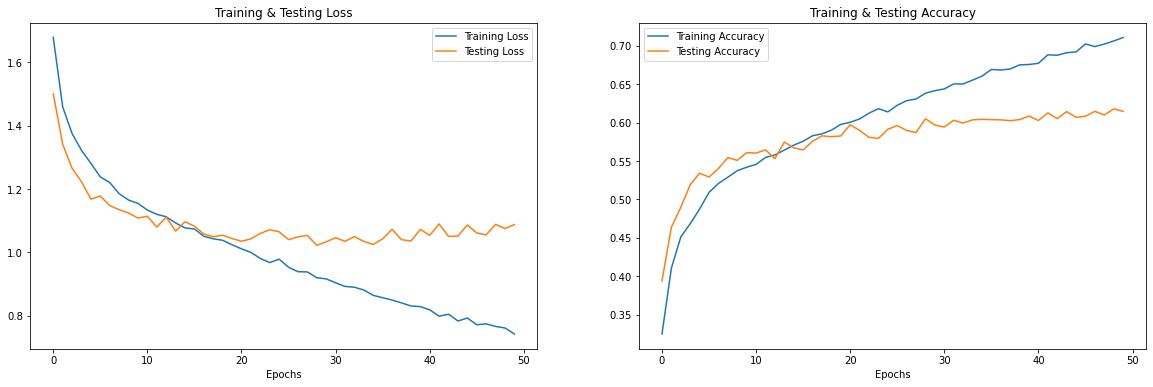

In [32]:
print("Accuracy of our model on test data : ",
      model.evaluate(x_test, y_test)[1]*100, "%")


epochs = [i for i in range(50)]


fig, ax = plt.subplots(1, 2)


train_acc = history.history['accuracy']
train_loss = history.history['loss']


test_acc = history.history['val_accuracy']


test_loss = history.history['val_loss']


fig.set_size_inches(20, 6)


ax[0].plot(epochs, train_loss, label='Training Loss')


ax[0].plot(epochs, test_loss, label='Testing Loss')


ax[0].set_title('Training & Testing Loss')


ax[0].legend()


ax[0].set_xlabel("Epochs")


ax[1].plot(epochs, train_acc, label='Training Accuracy')


ax[1].plot(epochs, test_acc, label='Testing Accuracy')


ax[1].set_title('Training & Testing Accuracy')


ax[1].legend()


ax[1].set_xlabel("Epochs")


plt.show()

In [33]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [34]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0          neutral       disgust
1          neutral       neutral
2             fear          fear
3            angry         angry
4            happy          fear
5              sad       disgust
6            angry         angry
7          disgust       disgust
8            happy       disgust
9          neutral       neutral

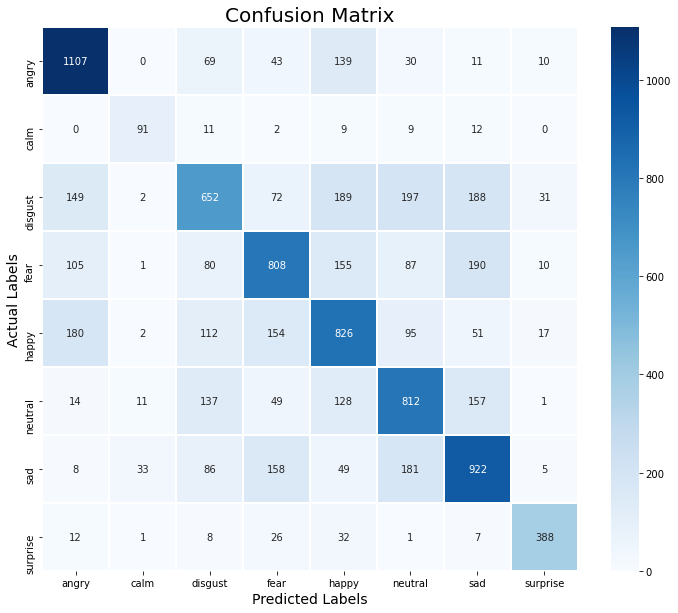

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[
                  i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues',
            linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.70      0.79      0.74      1409
        calm       0.65      0.68      0.66       134
     disgust       0.56      0.44      0.49      1480
        fear       0.62      0.56      0.59      1436
       happy       0.54      0.57      0.56      1437
     neutral       0.58      0.62      0.60      1309
         sad       0.60      0.64      0.62      1442
    surprise       0.84      0.82      0.83       475

    accuracy                           0.61      9122
   macro avg       0.64      0.64      0.64      9122
weighted avg       0.61      0.61      0.61      9122



- We can see our model is more accurate in predicting surprise, angry emotions and it makes sense also because audio files of these emotions differ to other audio files in a lot of ways like pitch, speed etc..
- We overall achieved 61% accuracy on our test data and its decent but we can improve it more by applying more augmentation techniques and using other feature extraction methods.


### This is all i wanna do in this project. Hope you guyz like this.

### If you like the kernel make sure to upvote it please :-)


In [55]:
model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same',
          activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(256, kernel_size=5, strides=1,
          padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1,
          padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1,
          padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 81, 256)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 41, 256)           0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 21, 128)           0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 21, 128)          

In [58]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4,
                         verbose=0, patience=2, min_lr=0.0000001)


# history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Train on 27364 samples, validate on 9122 samples
Epoch 1/100
27364/27364 [==============================] - 4s 145us/step - loss: 0.3788 - accuracy: 0.8546 - val_loss: 1.5339 - val_accuracy: 0.6223
Epoch 2/100
27364/27364 [==============================] - 4s 143us/step - loss: 0.3760 - accuracy: 0.8568 - val_loss: 1.5479 - val_accuracy: 0.6197
Epoch 3/100
27364/27364 [==============================] - 4s 144us/step - loss: 0.3768 - accuracy: 0.8552 - val_loss: 1.5672 - val_accuracy: 0.6225
Epoch 4/100
27364/27364 [==============================] - 4s 157us/step - loss: 0.3693 - accuracy: 0.8579 - val_loss: 1.5712 - val_accuracy: 0.6219
Epoch 5/100
27364/27364 [==============================] - 4s 146us/step - loss: 0.3676 - accuracy: 0.8596 - val_loss: 1.5703 - val_accuracy: 0.6221
Epoch 6/100
27364/27364 [==============================] - 4s 145us/step - loss: 0.3679 - accuracy: 0.8588 - val_loss: 1.5891 - val_accuracy: 0.6184
Epoch 7/100
27364/27364 [==============================] 

9122/9122 [==============================] - 1s 83us/step
Accuracy of our model on test data :  61.97105646133423 %


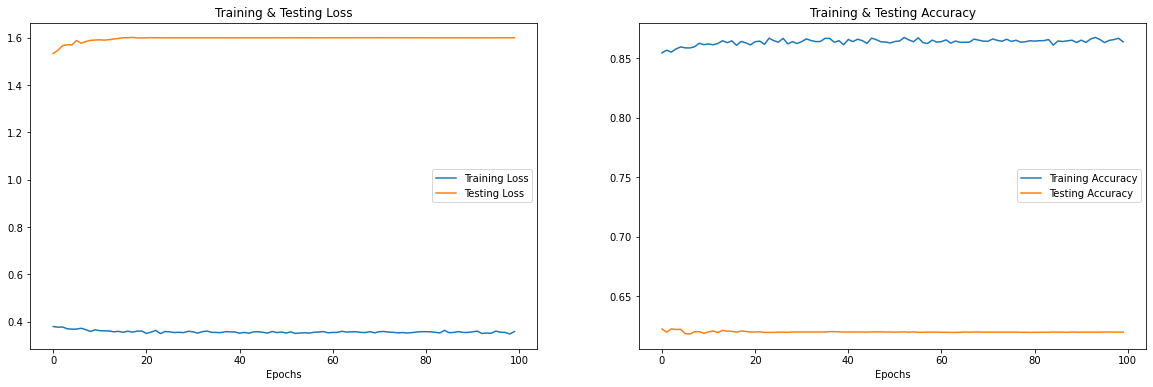

In [60]:
print("Accuracy of our model on test data : ",
      model.evaluate(x_test, y_test)[1]*100, "%")


epochs = [i for i in range(100)]


fig, ax = plt.subplots(1, 2)


train_acc = history.history['accuracy']
train_loss = history.history['loss']


test_acc = history.history['val_accuracy']


test_loss = history.history['val_loss']


fig.set_size_inches(20, 6)


ax[0].plot(epochs, train_loss, label='Training Loss')


ax[0].plot(epochs, test_loss, label='Testing Loss')


ax[0].set_title('Training & Testing Loss')


ax[0].legend()


ax[0].set_xlabel("Epochs")


ax[1].plot(epochs, train_acc, label='Training Accuracy')


ax[1].plot(epochs, test_acc, label='Testing Accuracy')


ax[1].set_title('Training & Testing Accuracy')


ax[1].legend()


ax[1].set_xlabel("Epochs")


plt.show()

In [61]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.76      0.74      0.75      1409
        calm       0.63      0.78      0.70       134
     disgust       0.54      0.52      0.53      1480
        fear       0.60      0.54      0.57      1436
       happy       0.58      0.60      0.59      1437
     neutral       0.57      0.59      0.58      1309
         sad       0.60      0.63      0.61      1442
    surprise       0.85      0.87      0.86       475

    accuracy                           0.62      9122
   macro avg       0.64      0.66      0.65      9122
weighted avg       0.62      0.62      0.62      9122



In [37]:
# model.save('model_orig.keras')
# model.save('model_orig.h5')

In [38]:
from tensorflow.keras.layers import Input, Conv2D, LSTM, Dense, Flatten, concatenate
from tensorflow.keras.models import Model


# Define the input shapes for raw audio data and spectrogram
raw_audio_input = Input(shape=(raw_audio_feature_dim,))
spectrogram_input = Input(
    shape=(spectrogram_height, spectrogram_width, spectrogram_channels))

# Branch for raw audio data
raw_audio_branch = LSTM(64)(raw_audio_input)
raw_audio_branch = Dense(32, activation='relu')(raw_audio_branch)

# Branch for spectrogram data
spectrogram_branch = Conv2D(32, (3, 3), activation='relu')(spectrogram_input)
spectrogram_branch = Flatten()(spectrogram_branch)
spectrogram_branch = Dense(32, activation='relu')(spectrogram_branch)

# Combine the two branches
combined = concatenate([raw_audio_branch, spectrogram_branch])

# Classifier head
output = Dense(num_classes, activation='softmax')(combined)

# Create the hybrid model
model = Model(inputs=[raw_audio_input, spectrogram_input], outputs=output)

# Compile the model with appropriate loss and optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()